### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [7]:
import pandas as pd

df = pd.read_csv('./data/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [14]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups

count_per_date = df.groupby(df['Date/Time'].dt.date)['Date/Time'].count()

# Find the date with the highest number of pickups

date_with_highest_pickups = count_per_date.idxmax()
print(date_with_highest_pickups)



2014-08-07


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [15]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups

count_per_date = df.groupby(df['Date/Time'].dt.date).size()
date_with_highest_pickups = count_per_date.idxmax()
filtered_df = df[df['Date/Time'].dt.date == date_with_highest_pickups]

# Get the count of pickups on the highest date
count_of_pickups = filtered_df.shape[0]
print(count_of_pickups)



32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [16]:
# Count the number of unique TLC base companies
num_unique_companies = df['Base'].nunique()

print(num_unique_companies)



5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [19]:
# Group by TLC base company and count the number of pickups
pickup_counts = df.groupby('Base')['Date/Time'].count()

# Find the TLC base company with the highest number of pickups
top_company = pickup_counts.idxmax()
print(top_company)

B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [20]:
# Group by TLC base company and count the number of pickups

sorted_pickup_counts = pickup_counts.sort_values(ascending=False)
top_companies = sorted_pickup_counts.head()
print(top_companies)


Base
B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Date/Time, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [21]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickup_counts_by_hour = df.groupby('Hour').size()

# Find the hour with the highest number of pickups

hour_with_highest_pickups = pickup_counts_by_hour.idxmax()
print(hour_with_highest_pickups)



17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

Matplotlib is building the font cache; this may take a moment.


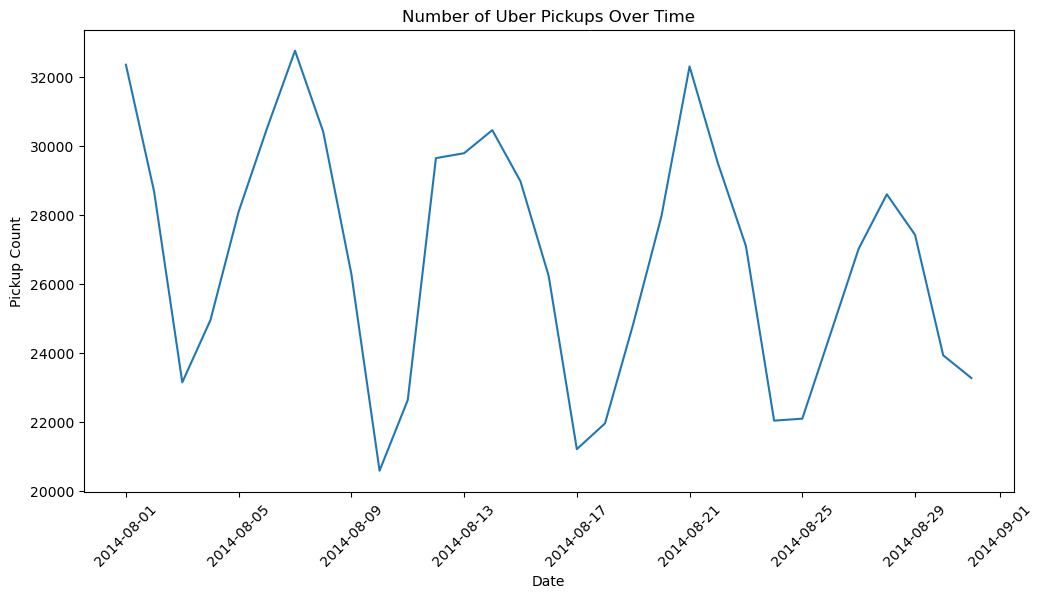

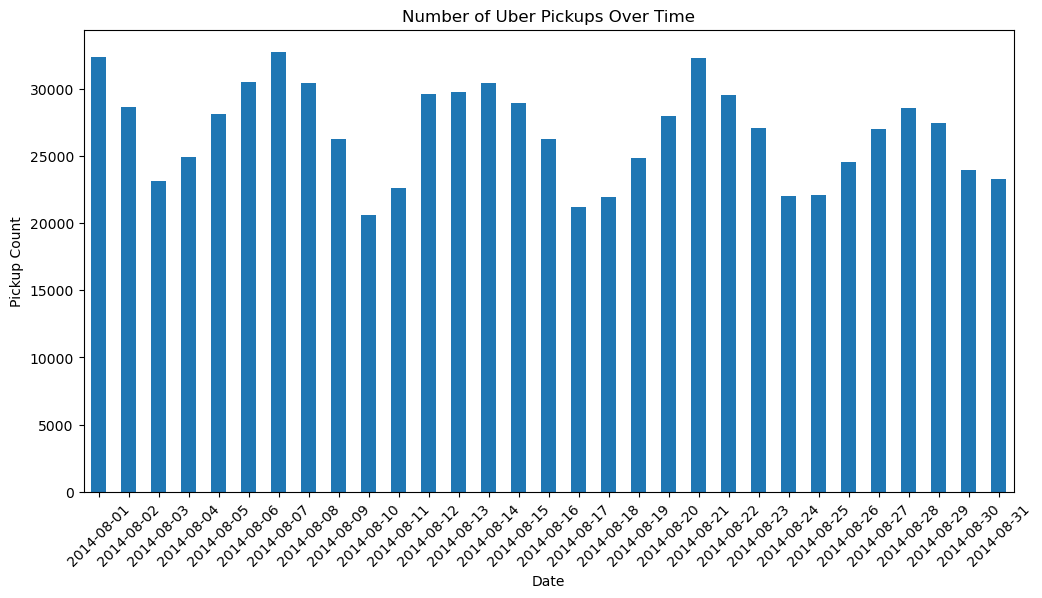

In [22]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickup_counts_by_date = df.groupby(df['Date/Time'].dt.date).size()

# Create a line plot to visualize the number of pickups over time
plt.figure(figsize=(12, 6))
pickup_counts_by_date.plot()
plt.title('Number of Uber Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Pickup Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
pickup_counts_by_date.plot(kind='bar')
plt.title('Number of Uber Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Pickup Count')
plt.xticks(rotation=45)
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

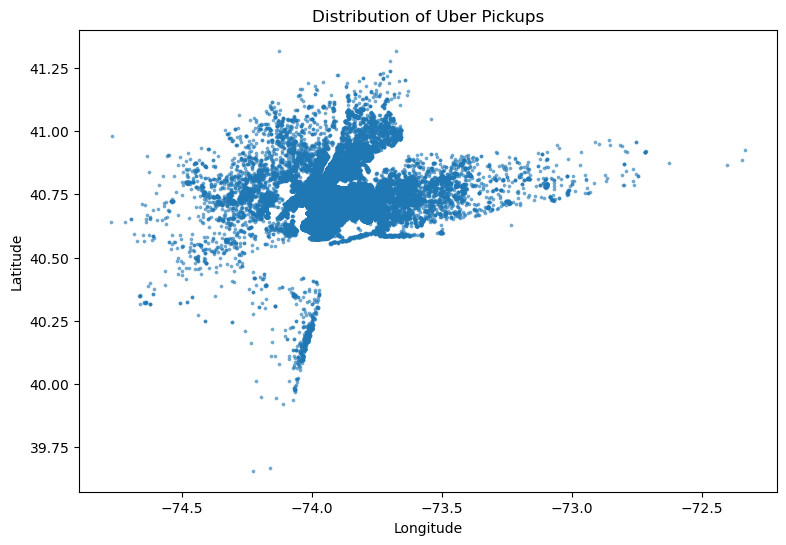

In [23]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(9, 6))
plt.scatter(df['Lon'], df['Lat'], s= 3, alpha= 0.5)
plt.title('Distribution of Uber Pickups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Base
B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Date/Time, dtype: int64


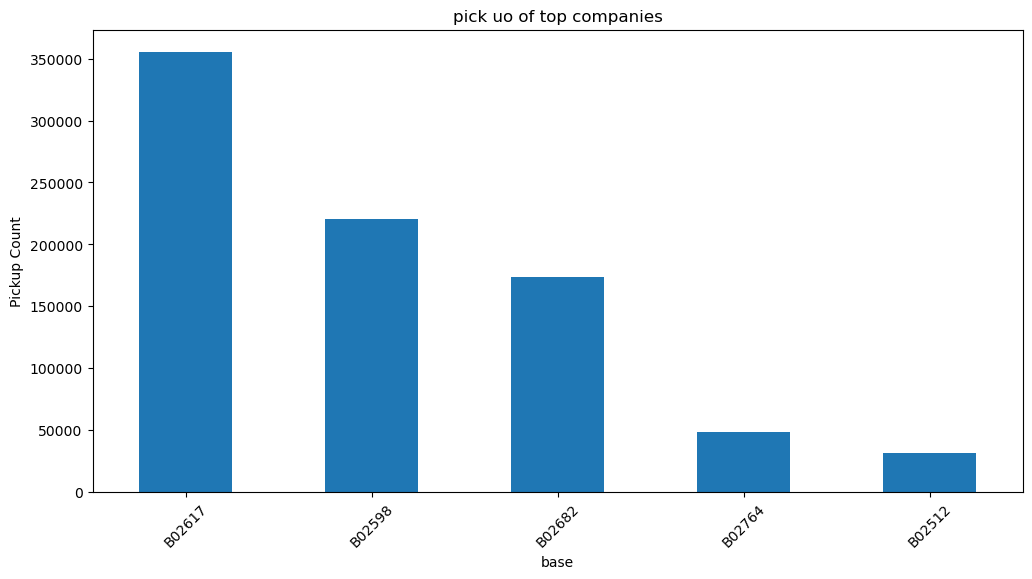

In [24]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
sorted_pickup_counts = pickup_counts.sort_values(ascending=False)
top_companies = sorted_pickup_counts.head()
print(top_companies)

plt.figure(figsize=(12, 6))
top_companies.plot(kind='bar')
plt.title('pick uo of top companies')
plt.xlabel('base')
plt.ylabel('Pickup Count')
plt.xticks(rotation=45)
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

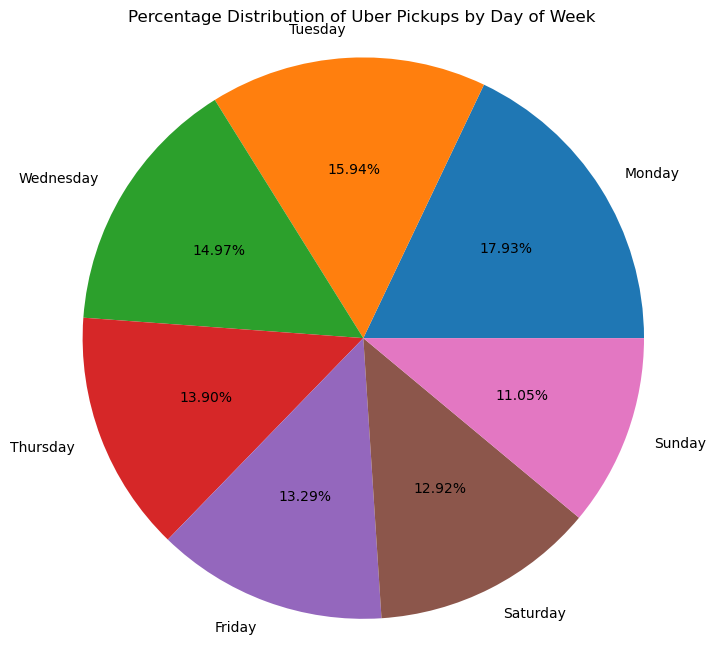

In [25]:
# Group by day of the week and count the number of pickups

df['DayOfWeek'] = df['Date/Time'].dt.dayofweek
pickup_counts_by_day = df['DayOfWeek'].value_counts()
pickup_percentages = pickup_counts_by_day / pickup_counts_by_day.sum() * 100

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 8))
plt.pie(pickup_percentages, labels=labels, autopct='%1.2f%%')
plt.title('Percentage Distribution of Uber Pickups by Day of Week')
plt.axis('equal')
plt.show()